In [ ]:
#Tarea 8.5 Bastian O. Espinoza A. 
#Haga una interpolación con polinomios de Lagrange y con spline cúbica a los siguientes datos. Compare y explique.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [32]:
puntos = np.array([[0.0, 0.8554428669760865],
 [0.10256410256410256, 0.8192503889643609],
 [0.20512820512820512, 0.9106698108197717],
 [0.3076923076923077, 0.8712405328999302],
 [0.41025641025641024, 1.028882810913172],
 [0.5128205128205128, 0.9042429634802972],
 [0.6153846153846154, 0.855131704289422],
 [0.717948717948718, 0.8320615040511042],
 [0.8205128205128205, 0.5404161442504423],
 [0.923076923076923, 0.4607411363876057],
 [1.0256410256410255, 0.5230079911073856],
 [1.1282051282051282, 0.4319333734735373],
 [1.2307692307692308, 0.3194709855419703],
 [1.3333333333333333, 0.3176511643072673],
 [1.435897435897436, 0.08845060273327107],
 [1.5384615384615383, -0.1118729194358061],
 [1.641025641025641, -0.05123505155215124],
 [1.7435897435897436, -0.2758484321392249],
 [1.846153846153846, -0.3354753113897514],
 [1.9487179487179487, -0.26956032827356446],
 [2.051282051282051, -0.571247853583287],
 [2.1538461538461537, -0.7087933751789464],
 [2.2564102564102564, -0.7346123839017604],
 [2.358974358974359, -0.9422578154572859],
 [2.4615384615384617, -0.6839691792454056],
 [2.564102564102564, -0.9525757587137708],
 [2.6666666666666665, -0.8747644889180131],
 [2.769230769230769, -0.9126743380349072],
 [2.871794871794872, -1.0825927238281552],
 [2.9743589743589745, -1.0103075868775828],
 [3.0769230769230766, -0.907399219424252],
 [3.1794871794871793, -0.851996743383459],
 [3.282051282051282, -0.9446601118164999],
 [3.3846153846153846, -1.0173310927863406],
 [3.4871794871794872, -0.8906772736257376],
 [3.5897435897435894, -0.896632562845944],
 [3.692307692307692, -0.8524291153089643],
 [3.7948717948717947, -0.6563668686292993],
 [3.8974358974358974, -0.8565509469076233],
 [4.0, -0.6052319246737182]])

In [33]:
def difer(puntos): #coeficientes de cada termino para x puntos 
    
    n = len(puntos) - 1
    Fs = [np.zeros(n + 1)]
    for i in range(n + 1):
        Fs[0][i] = puntos[i][1]
    for i in range(1, n + 1):
        Fs.append(np.zeros(n + 1 - i))
        for j in range(1, i + 1):
            Fs[j][i-j] = (Fs[j-1][i-j+1] - Fs[j-1][i-j])/(puntos[i][0] - puntos[i-j][0])
    
    return [Fs[i][0] for i in range(n + 1)]

In [46]:
def poly_lagrange(x, coefs, puntos): #polinomio de lagrange
    return sum(coefs[n]*np.prod([(x - puntos[i,0]) for i in range(n)]) for n in range(len(coefs)))

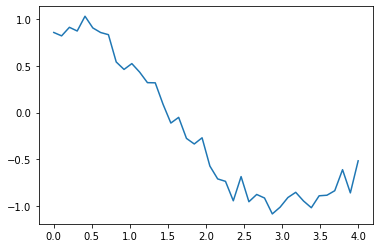

In [97]:
coef_lagrange = difer(puntos) #coeficientes del polinomio
x = np.linspace(0,4,40) #puntos en el intervalo
interpolacion_lagrange = [poly_lagrange(xi,coef_lagrange,puntos) for xi in x] #f(x) interpolado con lagrange
plt.plot(x,interpolacion_lagrange)
#plt.scatter(puntos[:,0],puntos[:,1])

In [55]:
def spline_coefs(puntos): #definimos la funcion que encuentra los coeficientes de cada termino del polinomio.
    
    n = len(puntos) - 1
    
    h = np.zeros(n)
    for i in range(n):
        h[i] = puntos[i + 1][0] - puntos[i][0]
    
    a = puntos[:,1]
    alpha = np.zeros(n - 1)
    for i in range(1, n):
        alpha[i-1] = (3/h[i])*(a[i+1] - a[i]) - (3/h[i-1])*(a[i] - a[i-1])
        
        
    # Se resuelve un sistema de ecuaciones:
    l = np.ones(n + 1)
    mu = np.zeros(n)
    z = np.zeros(n + 1)
    for i in range(1, n):
        l[i] = 2*(puntos[i+1][0] - puntos[i-1][0]) - h[i-1]*mu[i-1]
        mu[i] = h[i]/l[i]
        z[i] = (alpha[i-1] - h[i-1]*z[i-1])/l[i]
    b = np.zeros(n)
    c = np.zeros(n+1)
    d = np.zeros(n)
    for j in range(n-1,-1,-1):
        c[j] = z[j] - mu[j]*c[j+1]
        b[j] = (a[j+1] - a[j])/h[j] - h[j]*(c[j+1] + 2*c[j])/3
        d[j] = (c[j+1] - c[j])/(3*h[j])
        
    return a, b, c, d

In [56]:
def spline_eval(x, coefs, puntos): #definimos la funcion de spline cubica

    if x >= puntos[-1,0]:
        return puntos[-1,1]
    elif x <= puntos[0,0]:
        return puntos[0,1]
    
    i = find_ind(x, puntos)
    a, b, c, d = coefs
    return (a[i] + b[i]*(x - puntos[i][0]) + \
            c[i]*(x - puntos[i][0])**2 + d[i]*(x - puntos[i][0])**3)

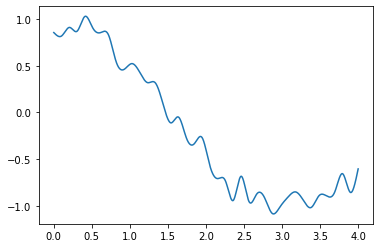

In [93]:
coef_cubi= spline_coefs(puntos) #coeficientes spline cubica
x2 = np.linspace(0, 4, 10000) #puntos en el intervalo
spline = [spline_eval(xi, coef_cubi, puntos) for xi in x2] #f(x) interpolado cubicamente
#plt.scatter(puntos[:,0], puntos[:,1], color='red')
plt.plot(x2, spline)

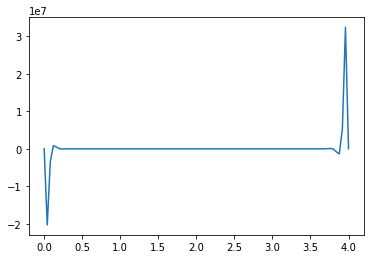

In [105]:
#claramente la interpolacion spline cubica es mas efectiva, esto es porque al tomar 4 coeficientes en vez de 1, la precision
#aumenta, de forma que podemos tomar mayor cantidad de subintervalos (mas pequeños) dentro de un intervalo de x
#el polinomio de lagrange es mas tosco, y se rompe al intentar hacerlo con mas subintervalos
coef_lagrange = difer(puntos)
x3 = np.linspace(0,4,100) #aumentamos la cantidad de puntos en el intervalo 
interpolacion_lagrange = [poly_lagrange(xi,coef_lagrange,puntos) for xi in x3]
plt.plot(x3,interpolacion_lagrange)

# Calificación: 7.0